In [1]:
# dependency
import numpy as np
import pandas as pd
import copy
import math
import sys
import os
from activations import relu, leaky_relu, sigmoid, tanh, softmax, d_sigmoid, d_relu
from initializers import glorot_uniform, random_normal, random_uniform
from regularizers import l1_regularizer, l2_regularizer
from utility import trim_tail, multiply, subtract, get_nparams, one_hot_encoding, get_data
from metrics import MSE, CCE, ACC, PRECISION, RECALL, essential_metrics, wondering_penalty, close_gap_penalty
from pso import PSO
from ga import GA
from nn import Network
from layer import DenseLayer
from scalers import MinMaxScaler, StandardScaler

In [2]:
# reference
metrics_fn_dict = dict()
metrics_fn_dict['accuracy'] = ACC
metrics_fn_dict['categorical_crossentropy'] = CCE
metrics_fn_dict['mean_square_error'] = MSE
metrics_fn_dict['precision'] = PRECISION
metrics_fn_dict['recall'] = RECALL
metrics_fn_dict['essential_metrics'] = essential_metrics

In [3]:
# model
model = Network(5, 0.0001)
model.add_layer(DenseLayer(1, 8, True, afn=sigmoid, dafn=d_sigmoid, rfn=None))
model.add_layer(DenseLayer(2, 4, True, afn=sigmoid, dafn=d_sigmoid, rfn=None))
model.add_layer(DenseLayer(3, 3, True, afn=sigmoid, dafn=d_sigmoid, rfn=None))

In [4]:
# optimizer
opt = 'sgd'

In [5]:
model.compile(loss_fn = 'mean_square_error', optimizer = opt, \
    metrics = ['accuracy', 'mean_square_error', 'essential_metrics','categorical_crossentropy'])

building layer 1 with 5
48
building layer 2 with 8
36
building layer 3 with 4
15


In [6]:
# data loading
DATA = os.path.join('c:\\Users\\AI-lab\\github_repo\\neural-network\\', 'dataset')
GROUP = 1
COLUMNS = ['f1', 'f2', 'f3', 'f4', 'f5', 'label']
N_CLASS = 3
EPOCHS = 1000
train_dir, test_dir = "..//dataset//training_data{}.txt".format(GROUP), "..//dataset//testing_data{}.txt".format(GROUP)
train, test = get_data(DATA, train_dir, COLUMNS), get_data(DATA, test_dir, COLUMNS)
# shuffle
train, test = train.sample(frac=1), test.sample(frac=1)
x_train, y_train = train.drop('label', axis=1), train['label']
x_test, y_test = test.drop('label', axis=1), test['label']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      107 non-null    float32
 1   f2      107 non-null    float32
 2   f3      107 non-null    float32
 3   f4      107 non-null    float32
 4   f5      107 non-null    float32
 5   label   107 non-null    float32
dtypes: float32(6)
memory usage: 2.6 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      108 non-null    float32
 1   f2      108 non-null    float32
 2   f3      108 non-null    float32
 3   f4      108 non-null    float32
 4   f5      108 non-null    float32
 5   label   108 non-null    float32
dtypes: float32(6)
memory usage: 2.7 KB
None


In [7]:
# data scaling and encoding
scaler = StandardScaler(['f1', 'f2', 'f3', 'f4', 'f5'])
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
y_train = one_hot_encoding(y_train, N_CLASS)
y_test = one_hot_encoding(y_test, N_CLASS)


In [8]:
# learning phase
history = model.fit(x_train, y_train, EPOCHS)

ation 579/1000: 	3.303013054281288
itr 580
Iteration 580/1000: 	3.30280759339151
itr 581
Iteration 581/1000: 	3.3026022212693533
itr 582
Iteration 582/1000: 	3.302396999538999
itr 583
Iteration 583/1000: 	3.302191868886884
itr 584
Iteration 584/1000: 	3.301986910735653
itr 585
Iteration 585/1000: 	3.301782062786934
itr 586
Iteration 586/1000: 	3.3015773082413706
itr 587
Iteration 587/1000: 	3.301372705678021
itr 588
Iteration 588/1000: 	3.3011682323564076
itr 589
Iteration 589/1000: 	3.3009638487098405
itr 590
Iteration 590/1000: 	3.3007595987945844
itr 591
Iteration 591/1000: 	3.3005555067834456
itr 592
Iteration 592/1000: 	3.3003515073906975
itr 593
Iteration 593/1000: 	3.30014760263727
itr 594
Iteration 594/1000: 	3.299943864081817
itr 595
Iteration 595/1000: 	3.2997402209722
itr 596
Iteration 596/1000: 	3.299536736140637
itr 597
Iteration 597/1000: 	3.299333346902708
itr 598
Iteration 598/1000: 	3.299130078006186
itr 599
Iteration 599/1000: 	3.298926965630793
itr 600
Iteration 600/

In [9]:
import matplotlib.pyplot as plt

def draw_plot(x, y_list, x_label=None, y_label=None, legend=None, title=None):
    fig, ax = plt.subplots(figsize=(12,5))
    for y in y_list:
        ax.plot(x, y)
    if x_label is not None and y_label is not None and title is not None:
        ax.set(xlabel=x_label, ylabel=y_label, title=title)
    if legend is not None:
        ax.legend(legend)
    ax.grid()
    plt.show()



In [10]:
print(history)

[3.5084951125699653, 3.507931859266261, 3.5073690478047697, 3.506806716550278, 3.506244839643717, 3.5056834537054056, 3.5051225197533933, 3.5045620556363164, 3.504002068065959, 3.5034425659372026, 3.502883507720229, 3.5023249420775446, 3.501766829405783, 3.5012091805327588, 3.500651997071109, 3.5000953163877804, 3.499539076099817, 3.4989833155283847, 3.4984280382033903, 3.497873210591777, 3.497318871595024, 3.4967650160531925, 3.496211613016046, 3.4956587355672992, 3.4951062547737792, 3.4945542808381496, 3.4940027873049124, 3.4934517405922527, 3.492901219603362, 3.49235111372426, 3.491801500774394, 3.491252368167909, 3.4907037139643653, 3.490155529017024, 3.4896078224479377, 3.489060565641958, 3.4885138197781043, 3.4879675142074182, 3.4874217181190943, 3.4868763679333723, 3.486331479370402, 3.485787112267136, 3.485243203621751, 3.484699738906652, 3.4841567901315598, 3.4836142625582793, 3.4830722430210184, 3.4825307149166553, 3.481989659128979, 3.4814490692113313, 3.480908969688968, 3.4

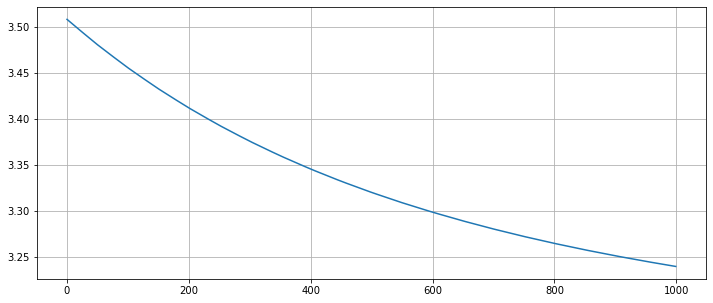

In [11]:
draw_plot(x = [i for i in range(len(history))], y_list = [history], x_label = 'Epochs', \
    y_label = model.loss_fn)

In [12]:
# recall phase
score = model.evaluate(x_test, y_test, False)
print(score)

[1. 0. 0.] <-> [array([0.94429153], dtype=float32), array([0.46797034], dtype=float32), array([0.18222566], dtype=float32)]
[1. 0. 0.] <-> [array([0.92756945], dtype=float32), array([0.5223287], dtype=float32), array([0.22814195], dtype=float32)]
[1. 0. 0.] <-> [array([0.9148813], dtype=float32), array([0.55800706], dtype=float32), array([0.2161805], dtype=float32)]
[1. 0. 0.] <-> [array([0.9456492], dtype=float32), array([0.4622144], dtype=float32), array([0.20697246], dtype=float32)]
[1. 0. 0.] <-> [array([0.9395956], dtype=float32), array([0.4797508], dtype=float32), array([0.14123432], dtype=float32)]
[1. 0. 0.] <-> [array([0.90976924], dtype=float32), array([0.5710061], dtype=float32), array([0.21206826], dtype=float32)]
[1. 0. 0.] <-> [array([0.920887], dtype=float32), array([0.54176474], dtype=float32), array([0.22149503], dtype=float32)]
[1. 0. 0.] <-> [array([0.9414937], dtype=float32), array([0.4766726], dtype=float32), array([0.24247535], dtype=float32)]
[1. 0. 0.] <-> [arra